<a href="https://colab.research.google.com/github/armandossrecife/icc/blob/main/top_500_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este dataset possui informações dos 500 filmes (maiores bilheterias até 2019), seus valores de produção e arrecadação.

O link dos dados pode ser obtido a partir da seguinte URL: 
https://raw.githubusercontent.com/armandossrecife/icc/main/movies.csv

# Importe as bibliotecas necessárias para a análise de dados

- Pandas, Numpy e Matplotlib

https://pandas.pydata.org/

https://numpy.org/

https://matplotlib.org/

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importe os dados do dataset para ser analisado

https://en.wikipedia.org/wiki/Wget


In [59]:
!wget https://raw.githubusercontent.com/armandossrecife/icc/main/movies.csv

--2023-03-15 17:31:46--  https://raw.githubusercontent.com/armandossrecife/icc/main/movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69811 (68K) [text/plain]
Saving to: ‘movies.csv.2’

movies.csv.2        100%[===================>]  68.17K  --.-KB/s    in 0.01s   

2023-03-15 17:31:46 (5.69 MB/s) - ‘movies.csv.2’ saved [69811/69811]



# 1. Crie um dataframe a partir do arquivo de dados

Por exemplo: 

In [60]:
df_movies = pd.read_csv('movies.csv')
df_movies

ValueError: ignored

ValueError: ignored

# 2.Descrição dos dados


In [61]:
linhas, colunas = df_movies.shape
print(f'Qtd linhas (registros): {linhas}, Qtd colunas: {colunas}')
print('---')

print('Lista de colunas:')
for coluna in df_movies.columns.to_list():
  print(coluna)

Qtd linhas (registros): 500, Qtd colunas: 13
---
Lista de colunas:
rank
release_date
title
url
production_cost
domestic_gross
worldwide_gross
opening_weekend
mpaa
genre
theaters
runtime
year


In [62]:
# Indices do dataframe
df_movies.index

RangeIndex(start=0, stop=500, step=1)

## 2.2 Informações básicas e descrição dos dados numéricos

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [63]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             500 non-null    int64  
 1   release_date     499 non-null    object 
 2   title            500 non-null    object 
 3   url              500 non-null    object 
 4   production_cost  500 non-null    int64  
 5   domestic_gross   500 non-null    int64  
 6   worldwide_gross  500 non-null    int64  
 7   opening_weekend  479 non-null    float64
 8   mpaa             492 non-null    object 
 9   genre            495 non-null    object 
 10  theaters         479 non-null    float64
 11  runtime          487 non-null    float64
 12  year             499 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ KB


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

In [64]:
# Verifica conteudo vazio
df_movies.isna()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,True,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [65]:
# Configura para exibição numérica normal (evita exibição de número científico)
pd.options.display.float_format = '{:.2f}'.format
df_movies.describe().round(2)

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
count,500.00,500.00,500.00,500.00,479.00,479.00,487.00,499.00
mean,250.50,149495400.00,169611380.41,469777564.92,54292057.06,3659.77,121.89,2011.39
std,144.48,47740402.71,142164157.93,385062025.78,46197963.76,546.02,22.40,6.56
min,1.00,91000000.00,0.00,0.00,48558.00,30.00,76.00,1991.00
25%,125.75,110000000.00,70471103.00,212218775.50,24218732.00,3378.50,104.50,2007.00
50%,250.50,140000000.00,131846962.50,367145769.00,41671198.00,3735.00,120.00,2012.00
75%,375.25,175000000.00,218599794.75,648425102.75,68123912.50,4065.00,135.00,2016.00
max,500.00,400000000.00,936662225.00,2910370905.00,357115007.00,4802.00,210.00,2023.00


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

Method of correlation - pearson : standard correlation coefficient

In [66]:
# Verifica a correção entre as colunas

df_movies.corr()

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
rank,1.00,-0.92,-0.46,-0.49,-0.52,-0.55,-0.22,-0.30
production_cost,-0.92,1.00,0.49,0.54,0.58,0.50,0.27,0.29
domestic_gross,-0.46,0.49,1.00,0.93,0.89,0.54,0.26,0.04
worldwide_gross,-0.49,0.54,0.93,1.00,0.82,0.54,0.31,0.10
opening_weekend,-0.52,0.58,0.89,0.82,1.00,0.62,0.26,0.21
theaters,-0.55,0.50,0.54,0.54,0.62,1.00,-0.01,0.51
runtime,-0.22,0.27,0.26,0.31,0.26,-0.01,1.00,0.00
year,-0.30,0.29,0.04,0.10,0.21,0.51,0.00,1.00


Considerando o fator de correlação >= 0.8 indica forte correlação entre as variáveis. Com isso, temos as seguintes variáveis correlacionadas:


worldwide_gross e domestic_gross

worldwide_gross e opening_weekend

domestic_gross e opening_weekend

Com isso, em um primeiro momento podemos deduzir que se o filme arrecadou bem nos cinemas americanos, ele tem forte tendência de arrecadar bem ao redor do mundo. Além disso, se o final de semana de estréia do filme arrecadar bem ele tem forte tendência de continuar arrecando bem ao longo do tempo. 

In [67]:
print('Arrecadação mundial de bilheteria')
index_desc = df_movies.describe().index.to_list()
print(index_desc)
print('---')
lista_valores_desc = df_movies.describe()['worldwide_gross'].to_list()
print(lista_valores_desc)

Arrecadação mundial de bilheteria
['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
---
[500.0, 469777564.92, 385062025.7784557, 0.0, 212218775.5, 367145769.0, 648425102.75, 2910370905.0]


In [68]:
print('Valores estatísticos de Arrecadação mundial dos 500 filmes de maiores bilheterias')
for k, v in zip(index_desc, lista_valores_desc):
  print(f'{k}: {round(v,2)}')

Valores estatísticos de Arrecadação mundial dos 500 filmes de maiores bilheterias
count: 500.0
mean: 469777564.92
std: 385062025.78
min: 0.0
25%: 212218775.5
50%: 367145769.0
75%: 648425102.75
max: 2910370905.0


### Tratamento das colunas com valores NaN (Nulos)

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
https://pandas.pydata.org/docs/reference/api/pandas.notna.html#pandas.notna

In [69]:
print('Exemplo: ')
opening_weekend_is_null = df_movies['opening_weekend'].isnull()
print(f'Qtd de opening_weekend nulls: {opening_weekend_is_null}')

Exemplo: 
Qtd de opening_weekend nulls: 0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499     True
Name: opening_weekend, Length: 500, dtype: bool


### Removendo os registros (linhas) que possuam dados nulos.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [70]:
df_movies_validos = df_movies.dropna()
df_movies_validos

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.00,PG-13,Action,4662.00,181.00,2019.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.00,PG-13,Adventure,4164.00,136.00,2011.00
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.00,PG-13,Action,4276.00,141.00,2015.00
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.00,PG-13,Adventure,4134.00,136.00,2015.00
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.00,PG-13,Action,4474.00,156.00,2018.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,2008-02-14,The Spiderwick Chronicles,/movie/Spiderwick-Chronicles-The#tab=summary,92500000,71195053,162839667,19004058.00,PG,Adventure,3847.00,96.00,2008.00
494,495,2004-10-22,The Incredibles,/movie/Incredibles-The#tab=summary,92000000,261441092,631441092,70467623.00,PG,Adventure,3933.00,115.00,2004.00
495,496,2013-02-06,A Good Day to Die Hard,/movie/Die-Hard-5#tab=summary,92000000,67349198,304249198,24834845.00,R,Action,3555.00,98.00,2013.00
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.00,PG-13,Western,2609.00,137.00,2004.00


In [71]:
df_movies_validos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             474 non-null    int64  
 1   release_date     474 non-null    object 
 2   title            474 non-null    object 
 3   url              474 non-null    object 
 4   production_cost  474 non-null    int64  
 5   domestic_gross   474 non-null    int64  
 6   worldwide_gross  474 non-null    int64  
 7   opening_weekend  474 non-null    float64
 8   mpaa             474 non-null    object 
 9   genre            474 non-null    object 
 10  theaters         474 non-null    float64
 11  runtime          474 non-null    float64
 12  year             474 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 51.8+ KB


In [72]:
linhas, colunas = df_movies_validos.shape
print(f'Qtd linhas: {linhas}, Qtd colunas: {colunas}')
print('---')
print('Lista de colunas:')
for coluna in df_movies.columns.to_list():
  print(coluna)

Qtd linhas: 474, Qtd colunas: 13
---
Lista de colunas:
rank
release_date
title
url
production_cost
domestic_gross
worldwide_gross
opening_weekend
mpaa
genre
theaters
runtime
year


#3. Quais os valores máximo, mínimo e a média dos valores mundiais de arrecadação (worldwide_gross)?


##3.1 Quais são os valores mínimo e máximo dos valores mundiais de arrecadação válidos (dados não nulos)?


In [73]:
valores = df_movies_validos['worldwide_gross'].describe().to_list()
indices_valores = df_movies_validos['worldwide_gross'].describe().index.to_list()

for k, v in zip(indices_valores, valores):
  print(k, round(v,2))

count 474.0
mean 488126242.45
std 383418474.68
min 23911362.0
25% 227624619.25
50% 377875827.5
75% 652490298.5
max 2910370905.0


##3.2 Gere um boxplot dos valores válidos das arrecadações mundiais. 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

<AxesSubplot:>

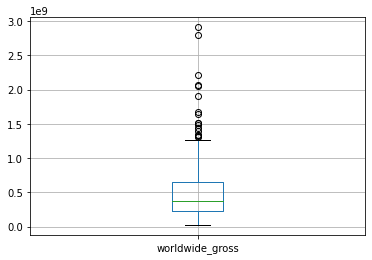

In [74]:
df_movies_validos.boxplot(column=['worldwide_gross'])

<AxesSubplot:>

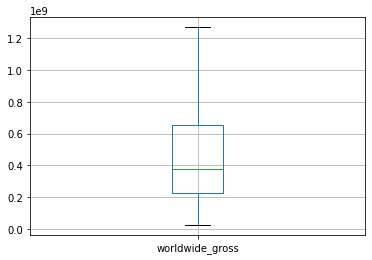

In [75]:
df_movies_validos.boxplot(column=['worldwide_gross'], showfliers=False)

In [76]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [77]:
outliers = find_outliers_IQR(df=df_movies_validos['worldwide_gross'])


In [78]:
lista_outliers = outliers.to_list()
print(f'Qtd outliers: {len(lista_outliers)}, {lista_outliers} ')

Qtd outliers: 17, [2797800564, 1395316979, 2064615817, 2048359754, 1331635141, 1647778651, 2910370905, 1515100211, 1669979967, 1912775610, 1336494321, 2207986545, 1514553486, 1478823595, 1308334005, 1445182280, 1316355322] 


In [79]:
df_outliers = outliers.to_frame()
df_outliers

,worldwide_gross
0,2797800564
2,1395316979
3,2064615817
4,2048359754
13,1331635141
14,1647778651
24,2910370905
29,1515100211
37,1669979967
46,1912775610


In [80]:
df_outliers.describe().round(decimals=2)

,worldwide_gross
count,17.00
mean,1758909597.24
std,501004926.68
min,1308334005.00
25%,1395316979.00
50%,1515100211.00
75%,2048359754.00
max,2910370905.00


##3.3 O histograma pode ajudar na análise dos valores.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

In [57]:
# Opcoes de configuracao de exibicao de dataframes https://pandas.pydata.org/docs/user_guide/options.html
# pd.options.display.float_format = '{:.2f}'.format
#pd.set_option('display.float_format', lambda x: '%,g' % x)

<AxesSubplot:>

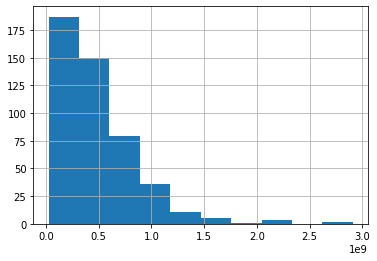

In [81]:
df_movies_validos['worldwide_gross'].hist()

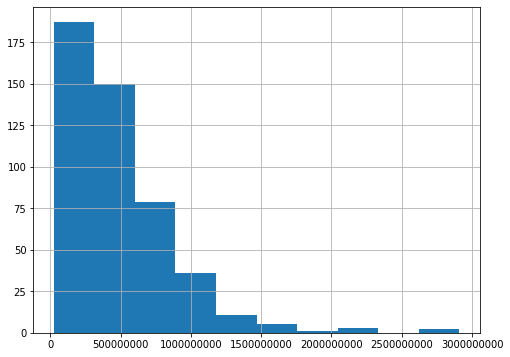

In [82]:
# configurando o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))

# criando o histograma com o método df.hist()
df_movies_validos['worldwide_gross'].hist(ax=ax)

# configurando o eixo x para não usar notação científica
ax.ticklabel_format(style='plain', axis='x')

# exibindo o gráfico
plt.show()

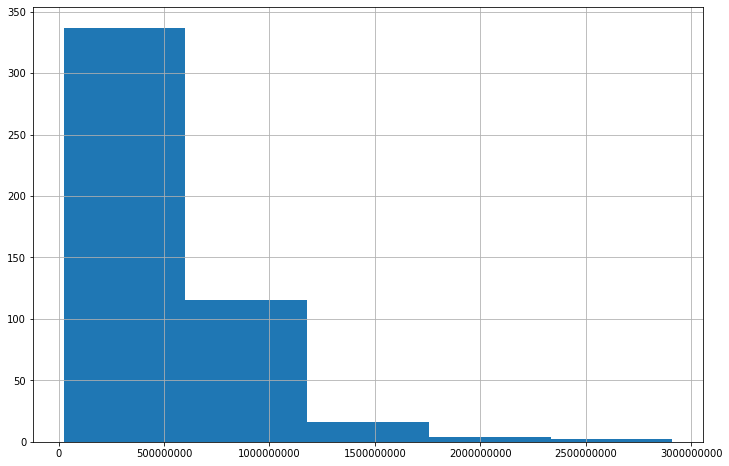

In [83]:
fig, ax = plt.subplots(figsize=(12, 8)) 
df_movies_validos['worldwide_gross'].hist(ax=ax, bins=5)
ax.ticklabel_format(style='plain', axis='x')
plt.show()

(array([ 96., 155.,  86.,  61.,  32.,  22.,  10.,   4.,   2.,   1.]),
 array([1.00000000e+00, 2.00000001e+08, 4.00000001e+08, 6.00000001e+08,
        8.00000001e+08, 1.00000000e+09, 1.20000000e+09, 1.40000000e+09,
        1.60000000e+09, 1.80000000e+09, 2.00000000e+09]),
 <BarContainer object of 10 artists>)

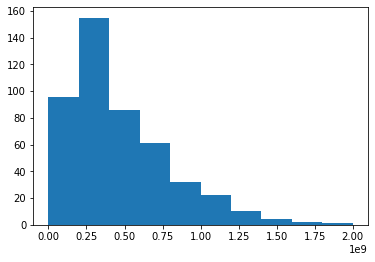

In [84]:
plt.hist(df_movies_validos['worldwide_gross'], range=[1, 2000000000])

#4. Quais são os gêneros de filmes disponíveis neste arquivo de dados?

sugestão: unique()

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [85]:
tipos_original = df_movies_validos['genre'].unique().tolist()
print(f'Qtd de generos: {len(tipos_original)}, {tipos_original}')

Qtd de generos: 10, ['Action', 'Adventure', 'Musical', 'Western', 'Drama', 'Thriller/Suspense', 'Comedy', 'Horror', 'Black Comedy', 'Romantic Comedy']


#5. Gere um novo dataframe contendo apenas os registros to dipo Adventure.

In [86]:
aventuras_validos = df_movies_validos['genre']=='Adventure'
type(aventuras_validos)

pandas.core.series.Series

In [87]:
df_movies_validos_aventuras = df_movies_validos[aventuras_validos]
df_movies_validos_aventuras

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.00,PG-13,Adventure,4164.00,136.00,2011.00
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.00,PG-13,Adventure,4134.00,136.00,2015.00
5,6,2007-05-24,Pirates of the Caribbean: At World’s End,/movie/Pirates-of-the-Caribbean-At-Worlds-End#...,300000000,309420425,960996492,114732820.00,PG-13,Adventure,4362.00,167.00,2007.00
9,10,2019-12-18,Star Wars: The Rise of Skywalker,/movie/Star-Wars-The-Rise-of-Skywalker-(2019)#...,275000000,515202542,1072848487,177383864.00,PG-13,Adventure,4406.00,142.00,2019.00
10,11,2018-05-23,Solo: A Star Wars Story,/movie/Solo-A-Star-Wars-Story#tab=summary,275000000,213767512,393151347,84420489.00,PG-13,Adventure,4381.00,135.00,2018.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,491,2001-12-19,The Lord of the Rings: The Fellowship of the Ring,/movie/Lord-of-the-Rings-The-Fellowship-of-the...,93000000,315544750,891216824,47211490.00,PG-13,Adventure,3381.00,179.00,2001.00
492,493,2011-08-05,Rise of the Planet of the Apes,/movie/Rise-of-the-Planet-of-the-Apes#tab=summary,93000000,176760185,470986200,54806191.00,PG-13,Adventure,3691.00,120.00,2011.00
493,494,2008-02-14,The Spiderwick Chronicles,/movie/Spiderwick-Chronicles-The#tab=summary,92500000,71195053,162839667,19004058.00,PG,Adventure,3847.00,96.00,2008.00
494,495,2004-10-22,The Incredibles,/movie/Incredibles-The#tab=summary,92000000,261441092,631441092,70467623.00,PG,Adventure,3933.00,115.00,2004.00


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [89]:
df_movies_validos.query("genre=='Adventure'")

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.00,PG-13,Adventure,4164.00,136.00,2011.00
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.00,PG-13,Adventure,4134.00,136.00,2015.00
5,6,2007-05-24,Pirates of the Caribbean: At World’s End,/movie/Pirates-of-the-Caribbean-At-Worlds-End#...,300000000,309420425,960996492,114732820.00,PG-13,Adventure,4362.00,167.00,2007.00
9,10,2019-12-18,Star Wars: The Rise of Skywalker,/movie/Star-Wars-The-Rise-of-Skywalker-(2019)#...,275000000,515202542,1072848487,177383864.00,PG-13,Adventure,4406.00,142.00,2019.00
10,11,2018-05-23,Solo: A Star Wars Story,/movie/Solo-A-Star-Wars-Story#tab=summary,275000000,213767512,393151347,84420489.00,PG-13,Adventure,4381.00,135.00,2018.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,491,2001-12-19,The Lord of the Rings: The Fellowship of the Ring,/movie/Lord-of-the-Rings-The-Fellowship-of-the...,93000000,315544750,891216824,47211490.00,PG-13,Adventure,3381.00,179.00,2001.00
492,493,2011-08-05,Rise of the Planet of the Apes,/movie/Rise-of-the-Planet-of-the-Apes#tab=summary,93000000,176760185,470986200,54806191.00,PG-13,Adventure,3691.00,120.00,2011.00
493,494,2008-02-14,The Spiderwick Chronicles,/movie/Spiderwick-Chronicles-The#tab=summary,92500000,71195053,162839667,19004058.00,PG,Adventure,3847.00,96.00,2008.00
494,495,2004-10-22,The Incredibles,/movie/Incredibles-The#tab=summary,92000000,261441092,631441092,70467623.00,PG,Adventure,3933.00,115.00,2004.00


##5.1 Qual o valor de arrecadação mundial médio, min e max dos filmes de aventura

In [ ]:
valores_aventura = df_movies_validos_aventuras.describe().round(decimals=2)
valores_aventura

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,245.04,151305365.85,183854951.80,495633751.49,53462540.97,3768.79,113.99,2010.82
std,145.85,48283770.27,133352182.54,337863964.59,40763325.99,427.98,22.92,5.95
min,2.00,91000000.00,17018422.00,39549758.00,474560.00,2608.00,76.00,1996.00
25%,116.00,110000000.00,83350911.00,243388614.00,25783232.00,3508.00,97.00,2007.00
50%,243.00,145000000.00,152901115.00,401021746.00,44026211.00,3835.00,109.00,2011.00
75%,370.00,180000000.00,241407328.00,710644566.00,68139035.00,4101.00,127.00,2016.00
max,499.00,379000000.00,936662225.00,2064615817.00,247966675.00,4802.00,201.00,2022.00


In [ ]:
print(f"Min de arrecadação mundial gênero aventura: {valores_aventura['worldwide_gross']['min']}")
print(f"Max de arrecadação mundial gênero aventura: {valores_aventura['worldwide_gross']['max']}")
print(f"Media de arrecadação mundial gênero aventura: {valores_aventura['worldwide_gross']['mean']}")

Min de arrecadação mundial gênero aventura: 39549758.0
Max de arrecadação mundial gênero aventura: 2064615817.0
Media de arrecadação mundial gênero aventura: 495633751.49


##5.2 Gere um boxplot dos valores de arrecadação mundial dos filmes de aveturas.

<AxesSubplot:>

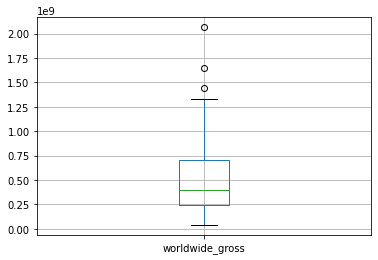

In [ ]:
df_movies_validos_aventuras.boxplot(column=['worldwide_gross'])

<AxesSubplot:>

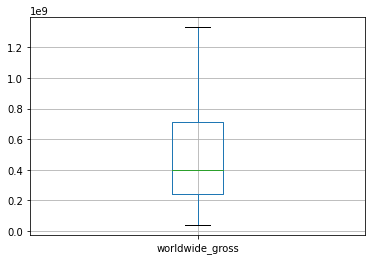

In [ ]:
df_movies_validos_aventuras.boxplot(column=['worldwide_gross'], showfliers=False)

In [ ]:
outliers_worldwide_gross_aventura = find_outliers_IQR(df=df_movies_validos_aventuras['worldwide_gross'])

lista_outliers_worldwide_gross_aventura = outliers_worldwide_gross_aventura.to_list()
print(f'Qtd outliers: {len(lista_outliers_worldwide_gross_aventura)}, {lista_outliers_worldwide_gross_aventura} ')


Qtd outliers: 3, [2064615817, 1647778651, 1445182280] 


In [ ]:
df_outliers_worldwide_gross_aventura = outliers_worldwide_gross_aventura.to_frame()
df_outliers_worldwide_gross_aventura

,worldwide_gross
3,2064615817
14,1647778651
189,1445182280


## 5.3. Crie um gráfico para mostrar a distribuição de frequência dos valores de arrecadação mundial dos filmes de aventura. Sugestão: pode criar 5 classes de valores para a distribuição de frequência. 

<AxesSubplot:ylabel='Frequency'>

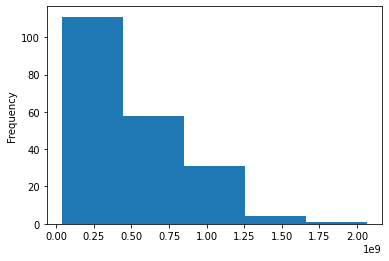

In [90]:
df_movies_validos_aventuras['worldwide_gross'].plot.hist(bins=5)

(array([39., 63., 41., 22., 21., 13.,  3.,  1.,  1.,  0.]),
 array([1.00000000e+00, 2.00000001e+08, 4.00000001e+08, 6.00000001e+08,
        8.00000001e+08, 1.00000000e+09, 1.20000000e+09, 1.40000000e+09,
        1.60000000e+09, 1.80000000e+09, 2.00000000e+09]),
 <BarContainer object of 10 artists>)

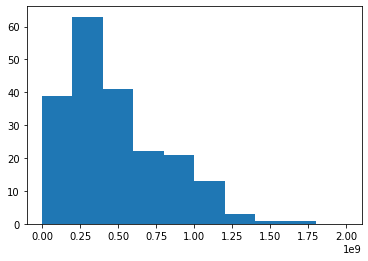

In [91]:
plt.hist(df_movies_validos_aventuras['worldwide_gross'], range=[1, 2000000000])

In [92]:
df_movies_validos_aventuras.query('worldwide_gross>=100000000 and worldwide_gross<=500000000')

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
10,11,2018-05-23,Solo: A Star Wars Story,/movie/Solo-A-Star-Wars-Story#tab=summary,275000000,213767512,393151347,84420489.00,PG-13,Adventure,4381.00,135.00,2018.00
11,12,2012-03-07,John Carter,/movie/John-Carter-of-Mars#tab=summary,263700000,73058679,282778100,30180188.00,PG-13,Adventure,3749.00,132.00,2012.00
25,26,2006-06-28,Superman Returns,/movie/Superman-Returns#tab=summary,232000000,200120000,391081192,52535096.00,PG-13,Adventure,4065.00,150.00,2006.00
32,33,2008-05-16,The Chronicles of Narnia: Prince Caspian,/movie/Chronicles-of-Narnia-Prince-Caspian-The...,225000000,141621490,417341288,55034805.00,PG,Adventure,3929.00,144.00,2008.00
44,45,2007-12-07,The Golden Compass,/movie/His-Dark-Materials-The-Golden-Compass#t...,205000000,70107728,367262558,25783232.00,PG-13,Adventure,3528.00,113.00,2007.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,485,2014-12-19,Seventh Son,/movie/Seventh-Son#tab=summary,95000000,17725785,108874967,7217640.00,PG-13,Adventure,2875.00,102.00,2014.00
488,489,2001-06-15,Lara Croft: Tomb Raider,/movie/Lara-Croft-Tomb-Raider#tab=summary,94000000,131144183,273330185,47735743.00,PG-13,Adventure,3349.00,100.00,2001.00
492,493,2011-08-05,Rise of the Planet of the Apes,/movie/Rise-of-the-Planet-of-the-Apes#tab=summary,93000000,176760185,470986200,54806191.00,PG-13,Adventure,3691.00,120.00,2011.00
493,494,2008-02-14,The Spiderwick Chronicles,/movie/Spiderwick-Chronicles-The#tab=summary,92500000,71195053,162839667,19004058.00,PG,Adventure,3847.00,96.00,2008.00


In [93]:
qtd_filmes_aventura_entre_100_500_milhoes = df_movies_validos_aventuras.query('worldwide_gross>=100000000 and worldwide_gross<=500000000').shape[0]
qtd_filmes_aventura_entre_100_500_milhoes

111

In [94]:
total_filmes_validos = df_movies_validos.shape[0]
total_filmes_validos

474

In [95]:
percentual_100_500 = round(qtd_filmes_aventura_entre_100_500_milhoes/total_filmes_validos, 2)

In [97]:
print(f'Os filmes de aventura entre 100 milhões e 500 milhões de dólares representam {percentual_100_500*100}% de todos os filmes analisados.')

Os filmes de aventura entre 100 milhões e 500 milhões de dólares representam 23.0% de todos os filmes analisados.
